# Mumps Preprocessing

In this ipynb we import the data of Mumps from the three GGD departments and show how we can use the developed modules to preprocess it. This Notebook contains the time series of the incidence rates for all GGD regions and for google trends.

## Preprocessing the Data

First we import the nescessary libraries and the Locations module. Then we will use the **disease_studied()** function with the **MonthlyTransform** class that has the **find_mun** and **find_GGD** methods to show how the preprocessing is automated. 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
import sys
import datetime as dt

In [2]:
sys.path.append(r'..\..\Central_Folder')
cwd = os.getcwd()

# Provide the right PATH of the Deep-Learning-Infectious-Diseases folder
os.chdir(r'PATH\Deep-Learning-Infectious-Diseases\Central_Folder' )

from Locations import disease_studied, MonthlyTransfrom
os.chdir(cwd)

In [3]:
ALLdf = disease_studied() # C:\Users\ekoulier\Desktop\Deep-Learning-Infectious-Diseases\Data\Mumps_Data\incidences

Please Copy and Paste the Data Directory: C:\Users\ekoulier\Desktop\Deep-Learning-Infectious-Diseases\Data\Mumps_Data\incidences
I will concatenate all the csv files for you.


In [4]:
ALLdf.head(n=1)

,Date,PostCode
0,20-11-2009,5625.0


In [5]:
data = MonthlyTransfrom(ALLdf)
data.find_mun()
data.find_GGD()
newdf = data.monthly_GGD() # C:\Users\ekoulier\Desktop\Deep-Learning-Infectious-Diseases\Data\Mumps_Data\trends

Please Give me the Directry of the Google Trends data: C:\Users\ekoulier\Desktop\Deep-Learning-Infectious-Diseases\Data\Mumps_Data\trends


In [6]:
newdf.head(n=1)

,Date,BZO,HVB,WB,Trends
0,2009-04-01,0,0,0,32


## Time Series

The data has been imported. Now we would like to explore the time series for all GGD regions and for google Trends.

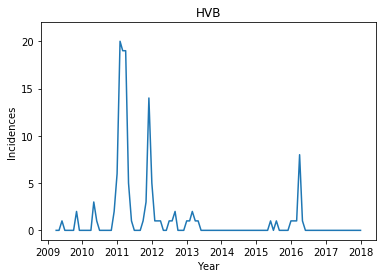

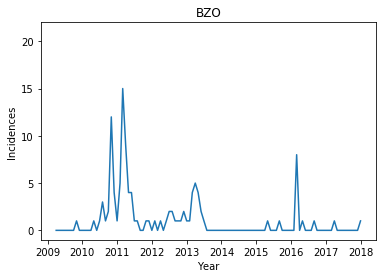

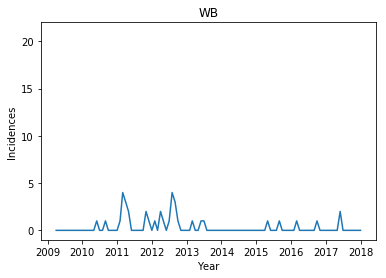

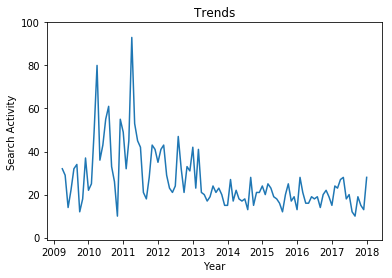

In [8]:
for column in ['HVB', 'BZO', 'WB', 'Trends']:
    plt.plot(newdf['Date'], newdf[column])
    plt.xlabel('Year')
    plt.ylabel('Incidences')
    plt.ylim(-1,22)
    if column == 'Trends':
        plt.ylabel('Search Activity')
        plt.ylim(-1,100)
    plt.title(column)
    plt.savefig('Mumps '+column, dpi=500)
    plt.show()